In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

states = ["dificil", "mediu", "usor"]
n_states = len(states)

observations = ["FB", "B", "S", "NS"]
n_observations = len(observations)

start_probability = [1/3, 1/3, 1/3]
transition_probability = np.array([
    [0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

emission_probability = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])

model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

model

CategoricalHMM(n_components=3)

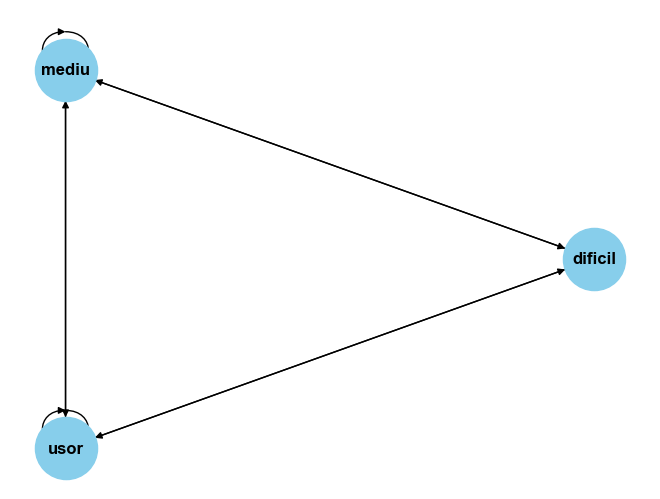

In [57]:
import networkx as nx

model_state_diagram = nx.MultiDiGraph()
for state in states:
    model_state_diagram.add_node(state)

row_count = len(transition_probability)
column_count = len(transition_probability[0])

edges = []
for i in range (0, row_count):
    for j in range (0, column_count):
        if transition_probability[i][j] > 0:
            # model_state_diagram.add_edge(states[i], states[j], weight=transition_probability[i][j])
            edges.append((states[i], states[j]))

model_state_diagram.add_edges_from(edges)

pos = nx.circular_layout(model_state_diagram)
nx.draw(model_state_diagram, pos=pos, with_labels=True, node_size=2000, font_weight='bold', node_color='skyblue')
plt.show()

Most likely hidden states: [2 2 0 2 0 1 0 2 0 2 0 1]


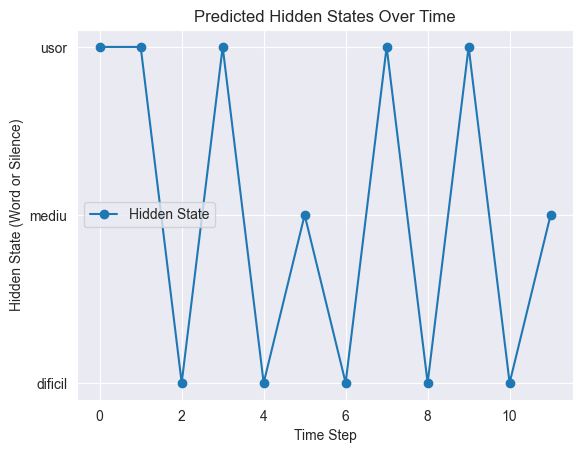

In [58]:
observations_sequence = np.array([0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]).reshape(-1, 1)
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

# Plot the results for visualization
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel("Time Step")
plt.ylabel("Hidden State (Word or Silence)")
plt.yticks(ticks=range(n_states), labels=states)
plt.legend()
plt.title("Predicted Hidden States Over Time")
plt.show()